## Libraries

In [1]:
from skimage.transform import resize
import json, os, pickle, matplotlib.pyplot as plt, numpy as np, pandas as pd
import torch, torchvision, torch.nn as nn, torch.optim as optim
import shutil
from sklearn.metrics import classification_report
from tqdm import tqdm_notebook as tqdm
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imageio import imread
from collections import Counter
from google.colab import auth
from imageio import imread
from PIL import Image
from torch.utils.data import TensorDataset, Dataset, DataLoader
from torch.utils.data._utils.collate import default_collate
from torchvision import models, transforms
from sklearn.metrics import roc_auc_score
from math import floor, sqrt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import math
from sklearn.metrics import roc_auc_score

%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')
#drive.mount('/content/drive',force_mount=True)
#auth.authenticate_user()

Mounted at /content/drive


# Processing data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/6.8610proj/dataset_ready.csv')

In [3]:
df

,dicom_id,subject_id,study_id,ViewPosition,Rows,Columns,label,img_path,reports,gender,anchor_age,marital_status,race,general_race_group
0,86a4065d-a51890c6-094034a8-c549f6b9-6660ff93,10406570,57207207,PA,3056,2500,0,/content/drive/My Drive/CVFinalProject/p104065...,FINAL REPORT\...,F,69,WIDOWED,BLACK/AFRICAN AMERICAN,Black/African Descent
1,a1072339-d1fe3a01-149f489b-9a08c49b-f2fee79e,10965697,51095949,AP,3056,2544,0,/content/drive/My Drive/CVFinalProject/p109656...,FINAL REPORT\...,F,67,WIDOWED,ASIAN - CHINESE,Asian
2,becf8ed6-c5f60c71-89040c32-9d94b7c6-eb956bc1,10104732,59794138,AP,3056,2544,0,/content/drive/My Drive/CVFinalProject/p101047...,WET READ: ___ ___ ___ 8:27 PM\n No change fr...,M,49,SINGLE,WHITE,White/Caucasian
3,db41181b-0c240a54-1a370211-3723e7a9-b6cdb316,10898945,50988324,AP,2606,2544,0,/content/drive/My Drive/CVFinalProject/p108989...,FINAL REPORT\...,M,78,MARRIED,WHITE,White/Caucasian
4,1739a403-be126d84-266aab85-442b24fc-a4ebe43c,10867055,59657889,AP,3050,2539,1,/content/drive/My Drive/CVFinalProject/p108670...,FINAL REPORT\...,M,47,SINGLE,WHITE,White/Caucasian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,f2c2edbd-7c1730dd-581dceae-d9b3f108-d71ed386,10598267,52745090,AP,3050,2539,1,/content/drive/My Drive/CVFinalProject/p105982...,FINAL REPORT\...,M,64,SINGLE,WHITE,White/Caucasian
1996,ebea62ac-7f9c3afd-efc2b3b6-0b4f656f-01046aeb,10438089,55429896,AP,2539,3050,0,/content/drive/My Drive/CVFinalProject/p104380...,FINAL REPORT\...,M,58,MARRIED,WHITE,White/Caucasian
1997,49245e8b-36a50571-3ac19e16-06753382-a22ccd97,10245082,59851549,AP,2544,3056,1,/content/drive/My Drive/CVFinalProject/p102450...,FINAL REPORT\...,M,77,DIVORCED,WHITE,White/Caucasian
1998,ff5cef07-c8fb5b4b-cdea400b-30ba52ed-418886eb,10805461,51014353,AP,3056,2544,1,/content/drive/My Drive/CVFinalProject/p108054...,FINAL REPORT\...,F,55,SINGLE,BLACK/AFRICAN AMERICAN,Black/African Descent


In [4]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

img_size = 224

def read_image(df):
    data = []
    for i in range(len(df)):
      try:
        img_arr = cv2.imread(df['img_path'][i])
        resized_arr = cv2.resize(img_arr, (img_size, img_size))
        data.append([resized_arr/255.0, df['label'][i]])
      except Exception as e:
                print(e)
    return np.array(data)

In [9]:
all_data = read_image(df)

<ipython-input-4-a31ecd3c11c8>:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [10]:
print(f'There are {len(all_data)} Images.')

There are 2000 Images.


In [11]:
file_path = '/content/drive/MyDrive/6.8610proj/dataset_ready.csv'

df.to_csv(file_path, index=False)

# Load data

In [ ]:
X_train = np.load('preprocessed data\X_train.npy')
X_valid = np.load('preprocessed data\X_val.npy')
X_test = np.load('preprocessed data\X_test.npy')
y_train = np.load('preprocessed data\y_train.npy')
y_valid = np.load('preprocessed data\y_val.npy')
y_test = np.load('preprocessed data\y_test.npy')

In [ ]:
# Loading the objects back:
with open('text_data.pkl', 'rb') as f:
    text_train, text_valid, text_test = pickle.load(f)

Text(0.5, 0.98, 'Different Channels of Chest X-Ray Image')

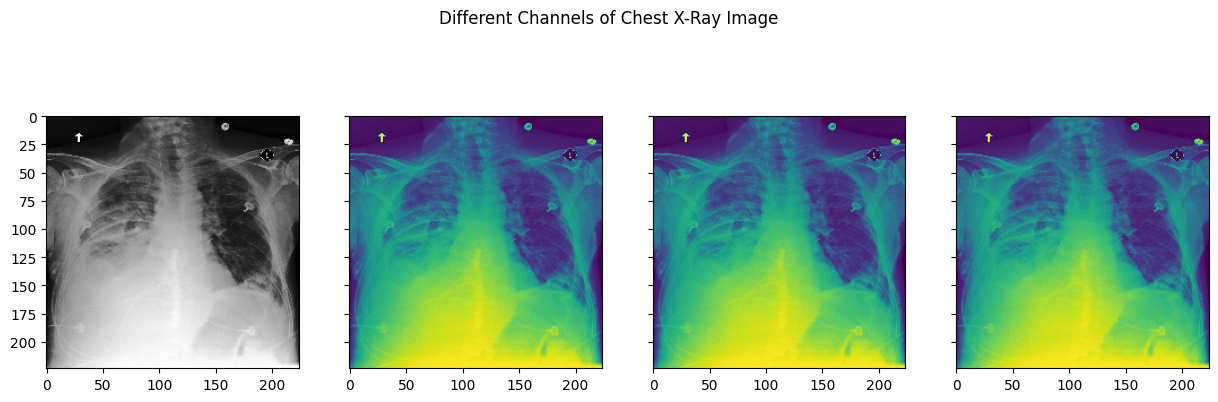

In [ ]:
image = X_train[0]

# plotting the original image and the RGB channels
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True)
f.set_figwidth(15)
ax1.imshow(image)

# RGB channels
# CHANNELID : 0 for Red, 1 for Green, 2 for Blue.
ax2.imshow(image[:, : , 0]) #Red
ax3.imshow(image[:, : , 1]) #Green
ax4.imshow(image[:, : , 2]) #Blue
f.suptitle('Different Channels of Chest X-Ray Image')

In [ ]:
print(f'Training Features Tensor Shape: {X_train.shape}')
print(f'Validation Features Tensor Shape: {X_valid.shape}')
print('\n')
print(f'Training Labels Tensor Shape: {y_train.shape}')
print(f'Validation Labels Tensor Shape: {y_valid.shape}')

Training Features Tensor Shape: (5727, 224, 224, 3)
Validation Features Tensor Shape: (819, 224, 224, 3)


Training Labels Tensor Shape: (5727, 2)
Validation Labels Tensor Shape: (819, 2)
